# Natural Language Processing
-------------

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
data = pd.read_csv("amazon.csv")

In [3]:
data

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [4]:
data.isnull().sum()

reviewText    0
Positive      0
dtype: int64

<AxesSubplot:xlabel='Positive', ylabel='count'>

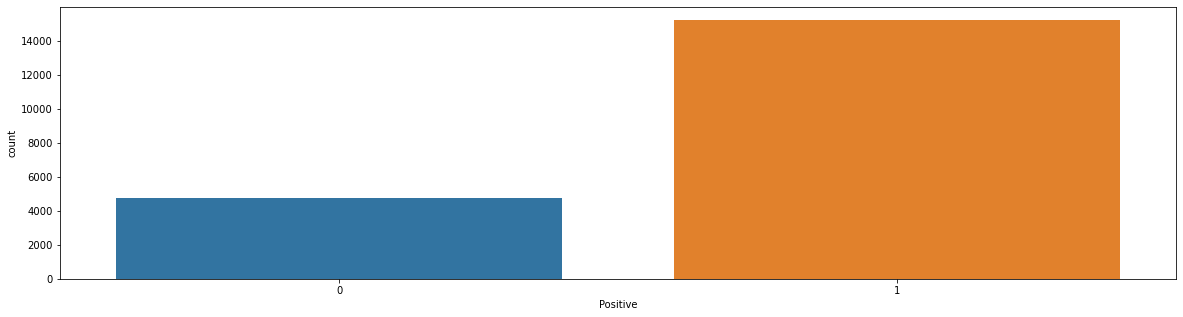

In [9]:
plt.figure(figsize = (20, 5))
sns.countplot(x = "Positive", data = data)

In [10]:
ps = PorterStemmer()

In [11]:
compile_ = []

In [12]:
for i in range(20000):
    
    text = re.sub("[^a-zA-Z]", " ", str(data.iloc[:, 0][i]))
    text = text.lower()
    text = word_tokenize(text)
    text = [ps.stem(word = word_) for word_ in text if not word_ is set(stopwords.words("english"))]
    text = " ".join(text)
    compile_.append(text)

In [13]:
compile_

['thi is a one of the best app acord to a bunch of peopl and i agre it ha bomb egg pig tnt king pig and realust stuff',
 'thi is a pretti good version of the game for be free there are lot of differ level to play my kid enjoy it a lot too',
 'thi is a realli cool game there are a bunch of level and you can find golden egg super fun',
 'thi is a silli game and can be frustrat but lot of fun and definit recommend just as a fun time',
 'thi is a terrif game on ani pad hr of fun my grandkid love it great entertain when wait in long line',
 'thi is a veri entertain game you don t have to be smart to play it i guess that s whi i like it it s easi and fun and that s what game are suppos to be be warn thi game is highli addict',
 'thi is awesom and you don t need wi ti to play trust me it is realli fun and addict there are like level it is even free don t wast your money on the expens one i mean serious get the app',
 'thi is awesom i bet no one even read the review becaus they know thi game i

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer()

In [19]:
x = cv.fit_transform(compile_).toarray()
y = data.iloc[:, 1].values

In [20]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
x.shape

(20000, 12974)

In [22]:
y

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [23]:
y.shape

(20000,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [26]:
train_data.shape

(13333, 12974)

In [27]:
train_labels.shape

(13333,)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [43]:
train_data = sc.fit_transform(train_data)
test_data = sc.fit_transform(test_data)

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
gnb = GaussianNB()

In [46]:
gnb.fit(train_data, train_labels)

GaussianNB()

In [47]:
y_pred = gnb.predict(test_data)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)

In [50]:
cm

array([[ 160, 1396],
       [ 185, 4926]], dtype=int64)

In [51]:
ac = accuracy_score(y_true = test_labels, y_pred = y_pred)

In [52]:
ac * 100

76.28618569071547